# Taxi Q-learning

In [26]:
import numpy as np
import gym
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = gym.make("Taxi-v3")
env.reset
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [3]:
print("Number of actions: %d" % env.action_space.n)
print("Number of states: %d" % env.observation_space.n)

action_size = env.action_space.n
state_size = env.observation_space.n

Number of actions: 6
Number of states: 500


In [4]:
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [36]:
total_episodes = 500
batch = 50
max_steps = 99

learning_rate = 0.7
gamma = 0.9 # discount rate

epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.01

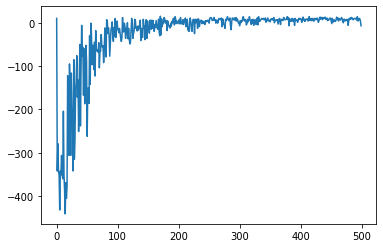

In [39]:
rewards = []

for episode in range(total_episodes):
    #Reset environment every time a new episode begins
    state = env.reset()
    step = 0
    done = False
    
    total_rewards = 0
    
    for step in range(max_steps):
        #Choose an action in current state
        
        #Generate random number
        exp_exp_tradeoff = random.uniform(0,1)
        
        #If random number > epsilon --> exploitation (select the action with the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state, :])
        #Else, do a random choice --> exploration
        else:
            action = env.action_space.sample()
        
        #Do the action (a) and observe the outcome state (s') and reward (R)
        new_state, reward, done, info = env.step(action)
        
        # Increment total reward
        total_rewards += reward
    
        '''
        Update q value for the state based on the Bellman formula
        Q(s,a) = Q(s,a) + lr[R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        '''
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        state = new_state
        
        if done is True:
            break
    
    # Increment episode
    episode += 1
    
    # Save reward of each step
    rewards.append(total_rewards) 
    
    #Reduce epsilon (because we want to reduce the number of exploration as time passes)
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
        
# Plot learning graph
plt.plot(rewards)

In [40]:
state = env.reset()
step = 0
done = False
total_rewards = 0
    
for step in range(max_steps):
    env.render()
    action = np.argmax(qtable[state, :])
    new_state, reward, done, info = env.step(action)
    total_rewards += reward
        
    if done is True:
        env.render()
        print("Score: ", total_rewards)
        break
    state = new_state
    
env.close()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : |_: : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: |_: :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |